In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest,SelectPercentile,SelectFromModel,chi2,f_classif,mutual_info_classif,RFE
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVC,LinearSVC,LinearSVR,SVR
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import gc


# Fetch data

In [2]:
data_concat = pd.read_excel('data.xlsx')
data_concat

,open,close,high,low,volume,money,ACCER,ADTM,MAADTM,MTR,...,CR,MASS,MAMASS,AMO,AMO1,AMO2,BR,AR,profit,profit_dis
0,6663.73,6889.74,7020.54,6627.64,11342822500,1.567173e+11,-0.033774,0.103388,0.195374,392.90,...,61.328374,24.405705,23.756116,1.567173e+07,1.328749e+07,1.467738e+07,53.964134,78.041188,-0.013412,0
1,6916.53,7065.61,7066.09,6878.65,10093042700,1.363515e+11,-0.029422,0.263710,0.220441,187.44,...,81.048662,24.740842,23.977813,1.363515e+07,1.359704e+07,1.428262e+07,63.771972,92.239621,0.025526,1
2,6937.42,6462.24,6937.42,6454.97,2842674200,3.478154e+10,-0.034488,0.208119,0.231063,610.64,...,61.129068,25.155155,24.254891,3.478154e+06,1.150453e+07,1.276140e+07,49.295701,72.751920,-0.085395,0
3,6618.08,6570.43,6689.14,6222.59,11112960500,1.389340e+11,-0.019077,-0.051251,0.214861,466.55,...,57.078920,25.634106,24.604724,1.389340e+07,1.163747e+07,1.273742e+07,56.335657,70.072972,0.016742,1
4,6435.89,6128.66,6529.88,6128.22,11560073600,1.331196e+11,-0.032916,-0.240524,0.195082,442.21,...,48.078312,26.073230,25.007326,1.331196e+07,1.199808e+07,1.278055e+07,45.065332,61.184554,-0.067236,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,4260.91,4233.96,4294.56,4217.79,6798362100,4.682410e+10,-0.005137,-0.023063,-0.373904,76.77,...,61.913304,27.553745,27.585646,4.682410e+06,5.268401e+06,4.897423e+06,58.693241,86.840421,-0.000109,0
685,4220.64,4162.53,4227.64,4144.81,5745157000,4.127810e+10,-0.004651,-0.095220,-0.307358,89.15,...,57.950275,27.438440,27.617406,4.127810e+06,4.703743e+06,4.861714e+06,54.140324,85.357584,-0.016871,0
686,4145.40,4204.54,4233.79,4096.14,7283465000,5.230816e+10,-0.003658,-0.235358,-0.256083,137.65,...,57.724272,27.358520,27.580256,5.230816e+06,4.660938e+06,4.944636e+06,57.217529,91.302167,0.010092,1
687,4207.76,4272.55,4298.24,4204.36,7468776500,5.324331e+10,0.001096,-0.206124,-0.204678,93.88,...,67.485252,27.255069,27.498138,5.324331e+06,4.840510e+06,5.005692e+06,64.763499,101.728797,0.016175,1


In [3]:
columns = data_concat.columns
data_x = data_concat[columns[:-2]]
data_y = data_concat[columns[-1]]


In [4]:
data_x

,open,close,high,low,volume,money,ACCER,ADTM,MAADTM,MTR,...,DIF,DIFMA,CR,MASS,MAMASS,AMO,AMO1,AMO2,BR,AR
0,6663.73,6889.74,7020.54,6627.64,11342822500,1.567173e+11,-0.033774,0.103388,0.195374,392.90,...,63.8504,186.92378,61.328374,24.405705,23.756116,1.567173e+07,1.328749e+07,1.467738e+07,53.964134,78.041188
1,6916.53,7065.61,7066.09,6878.65,10093042700,1.363515e+11,-0.029422,0.263710,0.220441,187.44,...,-11.9330,170.91584,81.048662,24.740842,23.977813,1.363515e+07,1.359704e+07,1.428262e+07,63.771972,92.239621
2,6937.42,6462.24,6937.42,6454.97,2842674200,3.478154e+10,-0.034488,0.208119,0.231063,610.64,...,-131.3038,141.07828,61.129068,25.155155,24.254891,3.478154e+06,1.150453e+07,1.276140e+07,49.295701,72.751920
3,6618.08,6570.43,6689.14,6222.59,11112960500,1.389340e+11,-0.019077,-0.051251,0.214861,466.55,...,-238.7938,98.11102,57.078920,25.634106,24.604724,1.389340e+07,1.163747e+07,1.273742e+07,56.335657,70.072972
4,6435.89,6128.66,6529.88,6128.22,11560073600,1.331196e+11,-0.032916,-0.240524,0.195082,442.21,...,-386.0136,36.89670,48.078312,26.073230,25.007326,1.331196e+07,1.199808e+07,1.278055e+07,45.065332,61.184554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,4260.91,4233.96,4294.56,4217.79,6798362100,4.682410e+10,-0.005137,-0.023063,-0.373904,76.77,...,-478.2322,-400.23540,61.913304,27.553745,27.585646,4.682410e+06,5.268401e+06,4.897423e+06,58.693241,86.840421
685,4220.64,4162.53,4227.64,4144.81,5745157000,4.127810e+10,-0.004651,-0.095220,-0.307358,89.15,...,-464.5346,-423.89028,57.950275,27.438440,27.617406,4.127810e+06,4.703743e+06,4.861714e+06,54.140324,85.357584
686,4145.40,4204.54,4233.79,4096.14,7283465000,5.230816e+10,-0.003658,-0.235358,-0.256083,137.65,...,-437.0338,-440.03732,57.724272,27.358520,27.580256,5.230816e+06,4.660938e+06,4.944636e+06,57.217529,91.302167
687,4207.76,4272.55,4298.24,4204.36,7468776500,5.324331e+10,0.001096,-0.206124,-0.204678,93.88,...,-407.8102,-448.55018,67.485252,27.255069,27.498138,5.324331e+06,4.840510e+06,5.005692e+06,64.763499,101.728797


# Data Preprocessing

In [5]:
def winsorize_and_standarlize(data,qrange=[0.05,0.95],axis=0):
    '''
    input:
    data:Dataframe or series,输入数据
    qrange:list,list[0]下分位数，list[1]，上分位数，极值用分位数代替
    '''
    if isinstance(data,pd.DataFrame):
        if axis == 0:
            q_down = data.quantile(qrange[0])
            q_up = data.quantile(qrange[1])
            index = data.index
            col = data.columns
            for n in col:
                array = np.array(data[n])
                data[n][data[n] > q_up[n]] = q_up[n]
                data[n][data[n] < q_down[n]] = q_down[n]
            data = (data - data.mean())/data.std()
            data = data.fillna(0)
        else:
            data = data.stack()
            data = data.unstack(0)
            q = data.quantile(qrange)
            index = data.index
            col = data.columns
            for n in col:
                data[n][data[n] > q[n]] = q[n]
            data = (data - data.mean())/data.std()
            data = data.stack().unstack(0)
            data = data.fillna(0)
            
    elif isinstance(data,pd.Series):
        name = data.name
        q = data.quantile(qrange)
        data[data>q] = q
        data = (data - data.mean())/data.std()
    return data

In [6]:
#PCA降维
from sklearn.decomposition import PCA
def pca_analysis(data,n_components='mle'):
    index = data.index
    model = PCA(n_components=n_components)
    model.fit(data)
    data_pca = model.transform(data)
    df = pd.DataFrame(data_pca,index=index)
    return df

# feature selection

In [7]:
class FeatureSelection():
    '''
    特征选择：
    identify_collinear：基于相关系数，删除小于correlation_threshold的特征
    identify_importance_lgbm：基于LightGBM算法，得到feature_importance,选择和大于p_importance的特征
    filter_select:单变量选择，指定k,selectKBest基于method提供的算法选择前k个特征，selectPercentile选择前p百分百的特征
    wrapper_select:RFE，基于estimator递归特征消除，保留n_feature_to_select个特征
    '''
    def __init__(self):
        self.supports = None #bool型，特征是否被选中
        self.columns = None  #选择的特征
        self.record_collinear = None #自相关矩阵大于门限值
        
    def identify_collinear(self, data, correlation_threshold):
        """
        Finds collinear features based on the correlation coefficient between features. 
        For each pair of features with a correlation coefficient greather than `correlation_threshold`,
        only one of the pair is identified for removal. 

        Using code adapted from: https://gist.github.com/Swarchal/e29a3a1113403710b6850590641f046c
        
        Parameters
        --------

        data : dataframe
            Data observations in the rows and features in the columns

        correlation_threshold : float between 0 and 1
            Value of the Pearson correlation cofficient for identifying correlation features

        """
        columns = data.columns
        self.correlation_threshold = correlation_threshold

        # Calculate the correlations between every column
        corr_matrix = data.corr()
        
        self.corr_matrix = corr_matrix
    
        # Extract the upper triangle of the correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
        # Select the features with correlations above the threshold
        # Need to use the absolute value
        to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]
        obtain_columns = [column for column in columns if column not in to_drop]
        self.columns = obtain_columns
        # Dataframe to hold correlated pairs
        record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

        # Iterate through the columns to drop
        for column in to_drop:

            # Find the correlated features
            corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

            # Find the correlated values
            corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
            drop_features = [column for _ in range(len(corr_features))]    

            # Record the information (need a temp df for now)
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})

            # Add to dataframe
            record_collinear = record_collinear.append(temp_df, ignore_index = True)

        self.record_collinear = record_collinear
        return data[obtain_columns]
     
        
    def identify_importance_lgbm(self, features, labels,p_importance=0.8, eval_metric='auc', task='classification', 
                                 n_iterations=10, early_stopping = True):
        """
        
        Identify the features with zero importance according to a gradient boosting machine.
        The gbm can be trained with early stopping using a validation set to prevent overfitting. 
        The feature importances are averaged over n_iterations to reduce variance. 
        
        Uses the LightGBM implementation (http://lightgbm.readthedocs.io/en/latest/index.html)

        Parameters 
        --------
        features : dataframe
            Data for training the model with observations in the rows
            and features in the columns

        labels : array, shape = (1, )
            Array of labels for training the model. These can be either binary 
            (if task is 'classification') or continuous (if task is 'regression')
            
        p_importance:float, range[0,1],default = 0.8
            sum of the importance of features above the value

        eval_metric : string
            Evaluation metric to use for the gradient boosting machine

        task : string, default = 'classification'
            The machine learning task, either 'classification' or 'regression'

        n_iterations : int, default = 10
            Number of iterations to train the gradient boosting machine
            
        early_stopping : boolean, default = True
            Whether or not to use early stopping with a validation set when training
        
        
        Notes
        --------
        
        - Features are one-hot encoded to handle the categorical variables before training.
        - The gbm is not optimized for any particular task and might need some hyperparameter tuning
        - Feature importances, including zero importance features, can change across runs

        """

        # One hot encoding
        data = features
        features = pd.get_dummies(features)

        # Extract feature names
        feature_names = list(features.columns)

        # Convert to np array
        features = np.array(features)
        labels = np.array(labels).reshape((-1, ))

        # Empty array for feature importances
        feature_importance_values = np.zeros(len(feature_names))
        
        print('Training Gradient Boosting Model\n')
        
        # Iterate through each fold
        for _ in range(n_iterations):

            if task == 'classification':
                model = lgb.LGBMClassifier(n_estimators=100, learning_rate = 0.05, verbose = -1)

            elif task == 'regression':
                model = lgb.LGBMRegressor(n_estimators=100, learning_rate = 0.05, verbose = -1)

            else:
                raise ValueError('Task must be either "classification" or "regression"')
                
            # If training using early stopping need a validation set
            if early_stopping:
                
                train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.15)

                # Train the model with early stopping
                model.fit(train_features, train_labels, eval_metric = eval_metric,
                          eval_set = [(valid_features, valid_labels)]
                           )
                
                # Clean up memory
                gc.enable()
                del train_features, train_labels, valid_features, valid_labels
                gc.collect()
                
            else:
                model.fit(features, labels)

            # Record the feature importances
            feature_importance_values += model.feature_importances_ / n_iterations

        feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

        # Sort features according to importance
        feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

        # Normalize the feature importances to add up to one
        feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
        feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])
        select_df = feature_importances[feature_importances['cumulative_importance']<=p_importance]
        select_columns = select_df['feature']
        self.columns = list(select_columns.values)
        res = data[self.columns]
        return res
        
    def filter_select(self, data_x, data_y, k=None, p=50,method=f_classif):
        columns = data_x.columns
        if k != None:
            model = SelectKBest(method,k)
            res = model.fit_transform(data_x,data_y)
            supports = model.get_support()
        else:
            model = SelectPercentile(method,p)
            res = model.fit_transform(data_x,data_y)
            supports = model.get_support()
        self.support_ = supports
        self.columns = columns[supports]
        return res
    
    def wrapper_select(self,data_x,data_y,n,estimator):
        columns = data_x.columns
        model = RFE(estimator=estimator,n_features_to_select=n)
        res = model.fit_transform(data_x,data_y)
        supports = model.get_support() #标识被选择的特征在原数据中的位置
        self.supports = supports
        self.columns = columns[supports]
        return res
    
    def embedded_select(self,data_x,data_y,estimator,threshold=None):
        '''
        threshold : string, float, optional default None
        The threshold value to use for feature selection. Features whose importance is greater or
        equal are kept while the others are discarded. If “median” (resp. “mean”), then the 
        threshold value is the median (resp. the mean) of the feature importances. 
        A scaling factor (e.g., “1.25*mean”) may also be used. If None and if the estimator
        has a parameter penalty set to l1, either explicitly or implicitly (e.g, Lasso),
        the threshold used is 1e-5. Otherwise, “mean” is used by default.
        '''
        columns = data_x.columns
        model = SelectFromModel(estimator=estimator,prefit=False,threshold=threshold)
        res = model.fit_transform(data_x,data_y)
        supports = model.get_support()
        self.supports = supports
        self.columns = columns[supports]
        return res


In [12]:
f = FeatureSelection()
datax_new = winsorize_and_standarlize(data_x)
#datax_pca = pca_analysis(datax_new, n_components=0.95)
lgbm_res = f.identify_importance_lgbm(datax_new, data_y)
print(f.columns)
print(lgbm_res)
lgbm_res.to_excel('lgbm_results.xlsx', index=False)

C:\Users\Luca HU\AppData\Local\Temp\ipykernel_15684\797696695.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[n][data[n] > q_up[n]] = q_up[n]
C:\Users\Luca HU\AppData\Local\Temp\ipykernel_15684\797696695.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[n][data[n] < q_down[n]] = q_down[n]
C:\Users\Luca HU\AppData\Local\Temp\ipykernel_15684\797696695.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[n][data[n] 

Training Gradient Boosting Model

['MAWR', 'ACCER', 'BIAS', 'MTR', 'CYE', 'KBJ', 'RSI', 'WR', 'CCI', 'MASS', 'open', 'ADTM', 'MAMASS', 'volume', 'money', 'CHO', 'ATR']
         MAWR     ACCER      BIAS       MTR       CYE       KBJ       RSI  \
0    1.121545 -2.295837 -2.374058  2.756630 -2.271840 -1.244953 -1.797284   
1    0.598374 -2.295837 -2.347809  1.749534 -2.271840 -1.205879 -1.086936   
2    1.678230 -2.295837 -2.374058  2.756630 -2.271840 -1.461179 -1.797284   
3    1.093218 -2.295837 -2.374058  2.756630 -2.271840 -1.515633 -1.454353   
4    1.678230 -2.295837 -2.374058  2.756630 -2.271840 -1.637938 -1.797284   
..        ...       ...       ...       ...       ...       ...       ...   
684 -0.276478 -0.738185  0.031974 -0.287102  1.057846  0.083750 -0.314234   
685  1.121061 -0.657889 -1.207564 -0.059275 -1.398808  0.046478 -0.806720   
686  0.474172 -0.493903 -0.190113  0.833260 -0.324389  0.054580 -0.356844   
687 -0.909595  0.291134  0.856025  0.027770  0.356090  0.23163

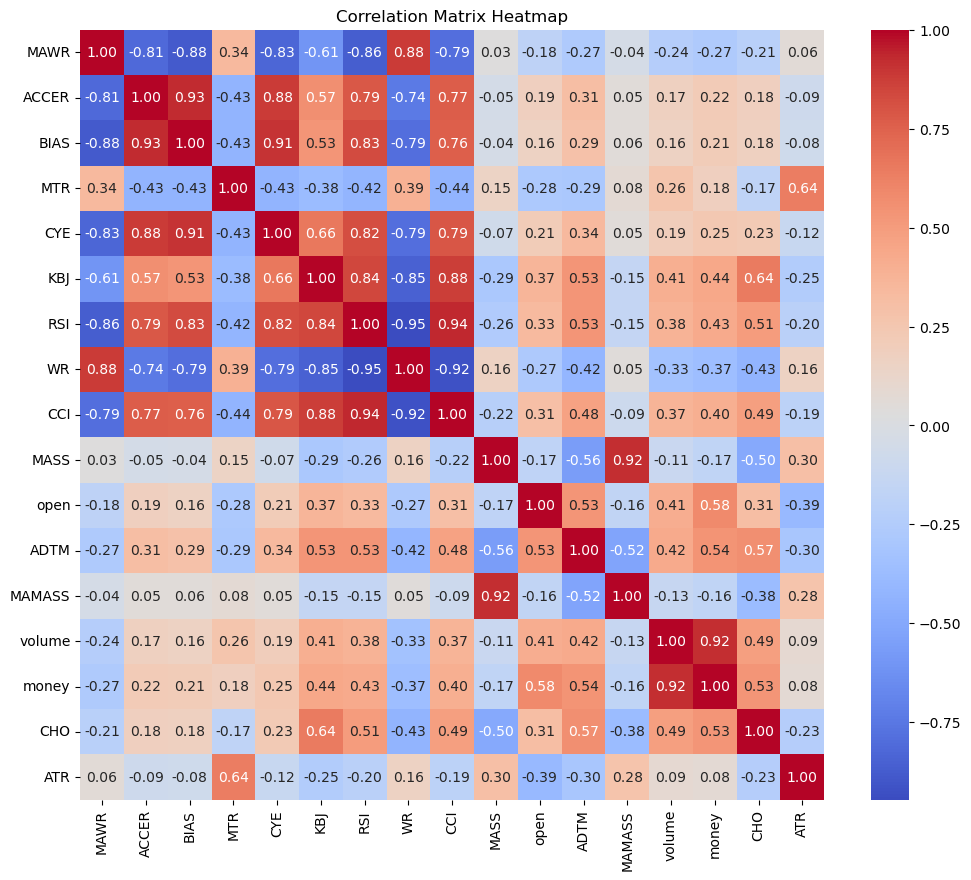

['KBJ', 'MAWR', 'WR', 'CCI', 'ADTM', 'RSI', 'volume', 'money', 'CHO', 'MAMASS']


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(lgbm_res)
corr = df.corr()
plt.figure(figsize=(12, 10))
# 绘制热图
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
# 设置图形的标题
plt.title('Correlation Matrix Heatmap')
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
# 显示图形
plt.show()
# Get the mean importance of each feature
feature_importances = lgbm_res.abs().mean().sort_values(ascending=False)

# Select the top 10 features
top_10_features = feature_importances.head(10)

# Print the names of these features
print(top_10_features.index.tolist())

# Save the names of the top 10 features
top_10_feature_names = top_10_features.index.tolist()

# Select the columns of the top 10 features from the original data
top_10_data = datax_new[top_10_feature_names]

# Save this data to an Excel file
top_10_data.to_excel('top_10_features.xlsx', index=False)

In [24]:
estimator = LinearSVC()
res = f.wrapper_select(data_x=data_x,data_y=data_y,n=10,estimator=estimator)
print(f.columns)
columns_to_save = ['open', 'volume', 'money', 'DKX', 'OSC', 'MAUDL', 'CHO', 'MACHO', 'AMO1', 'AMO2']

# Select only the desired columns
data_to_save = data_x[columns_to_save]

# Save to a CSV file
data_to_save.to_csv('selected_columns_data.csv', index=False)

D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda\Lib\

D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The de

Index(['open', 'volume', 'money', 'DKX', 'OSC', 'MAUDL', 'CHO', 'MACHO',
       'AMO1', 'AMO2'],
      dtype='object')


D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The de

In [25]:
est = LinearSVC(C=0.01,penalty='l1',dual=False)
est1 = RandomForestClassifier()
e_res = f.embedded_select(data_x=data_x,data_y=data_y,estimator=est1)
print(f.columns)
data_to_save = data_x[f.columns]
# Save to a CSV file
data_to_save.to_csv('selected_columns_data_embedded.csv', index=False)

Index(['ACCER', 'MTR', 'BIAS', 'CCI', 'KBJ', 'CYE', 'RSI', 'RSI6', 'WR',
       'MAWR'],
      dtype='object')
